# Example using hetdex_api::hetdex_tools.mcmc_gauss

In [1]:
from hetdex_tools import mcmc_gauss
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
#just to make up some data to fit
def gaussian(x,u1,s1,A1=1.0,y=0.0):
    if (x is None) or (u1 is None) or (s1 is None):
        return None
    return A1 * (np.exp(-np.power((x - u1) / s1, 2.) / 2.) / np.sqrt(2 * np.pi * s1 ** 2)) + y

In [4]:
#made up data
mu = 4500
sigma=10
A=50
y=1.0
waves = np.arange(3540,5542,2)
data_flux = gaussian(waves,u1=mu,s1=sigma,A1=A,y=y)
data_err = np.random.uniform(0.1,1.0,len(waves))

In [5]:
#instatiate an MCMC_Gauss object and populate
#you can optionally pass a logger instance to the constructor, otherwise it will make its own 
fit = mcmc_gauss.MCMC_Gauss()
#set the initial guesss
#(here you can see it is set wrong to show we converge on the correct answer)
fit.initial_A = 25
fit.initial_y = 0
fit.initial_sigma = 5
fit.initial_mu = 4503
fit.initial_peak = None

#set the data to fit
fit.data_x = waves
fit.data_y = data_flux
fit.err_y = data_err
fit.err_x = np.zeros(len(fit.err_y))


#these are the defaults and don't have to be set
fit.max_sigma = 10.0
fit.min_sigma = 2
fit.range_mu = 5.0
fit.max_A_mult = 2.0
fit.max_y_mult = 2.0
fit.min_y = -10.0 

fit.burn_in = 250
fit.main_run = 1000
fit.walkers = 100

In [6]:
fit.run_mcmc()

[INFO - 2023-05-01 11:19:23,265] MCMC SNR model Area with data error: 10.209484182359114 +/- 0.4851826736113066
[INFO - 2023-05-01 11:19:23,266] MCMC mu: initial[4503] mcmc(4500.1, +0.7706, -0.73724)
[INFO - 2023-05-01 11:19:23,267] MCMC sigma: initial[5] mcmc(9.4008, +0.41021, -0.58665)
[INFO - 2023-05-01 11:19:23,267] MCMC A: initial[25] mcmc(47.309, +1.8377, -2.6589) *usually over 2AA bins
[INFO - 2023-05-01 11:19:23,268] MCMC y: initial[0] mcmc(1.0013, +0.011243, -0.010914)
[INFO - 2023-05-01 11:19:23,268] MCMC SNR: 10.209
[INFO - 2023-05-01 11:19:23,268] MCMC f: initial[0] mcmc(0.0087721, +3.3822e+14, -3.5344e+14)


True

In [7]:
help( mcmc_gauss.MCMC_Gauss)

Help on class MCMC_Gauss in module hetdex_tools.mcmc_gauss:

class MCMC_Gauss(builtins.object)
 |  MCMC_Gauss(logger=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, logger=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  approx_symmetric_error(self, parm)
 |  
 |  compute_model(self, x, mu, sigma, A, y)
 |  
 |  lnlike(self, theta, x, y, yerr)
 |  
 |  lnprior(self, theta)
 |      # if any are zero, the whole prior is zero
 |      # all priors here are uniformitive ... i.e they are all flat ... either zero or one
 |  
 |  lnprob(self, theta, x, y, yerr)
 |      ln(probability)
 |      
 |      :param theta: parameters to check
 |      :param x:  THE data (x axis or wavelengths, in this case)
 |      :param y: THE data (y axis or flux counts, in this case)
 |      :param yerr:  The error on the y axis data flux counts
 |      :return:
 |  
 |  model(self, x, theta)
 |  
 |  noise_model(self)
 |  
 |  run_mcmc(self)
 |  
 |  sanity_check_

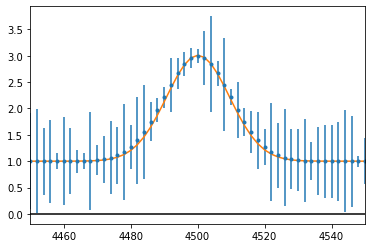

In [8]:
plt.close('all')
plt.errorbar(waves,data_flux,data_err,fmt='.')
plt.plot(waves,gaussian(waves,u1=fit.mcmc_mu[0],s1=fit.mcmc_sigma[0],A1=fit.mcmc_A[0],y=fit.mcmc_y[0]))
plt.axhline(0,c='k')
plt.xlim(mu-50,mu+50)
plt.show()